# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


**Tasks, Part 1**

linear regression equation for mileage vs price.

In [ ]:
x = df[['Mileage']]
y = df[['Price']]
lReg = linear_model.LinearRegression()
lReg.fit(x, y)
print('Intercept:', lReg.intercept_)
print('Coefficient:',lReg.coef_)
print('Score:', lReg.score(x, y))

Intercept: [24764.55900606]
Coefficient: [[-0.1725205]]
Score: 0.02046344732348926


the original data and the equation on the chart.


Text(0.5, 1.0, 'Mileage vs Price Chart')

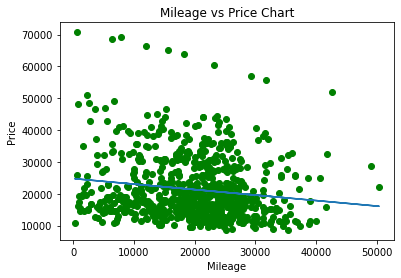

In [ ]:
plt.scatter(x, y, color='g')
plt.plot(x, lReg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price Chart')

Finding R2  score


In [ ]:
print('R-squared:', lReg.score(x, y))


R-squared: 0.02046344732348926


**Here R-squared value is 0.2 which means the equation is not a good fit for this data**

**Tasks, Part 2**

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

xFeatures = df[features]
y = df[price]

lReg2 = linear_model.LinearRegression()
lReg2.fit(xFeatures, y)

LinearRegression()

In [ ]:
print('R-squared:', lReg2.score(xFeatures, y))

R-squared: 0.446264353672838


**Here R-squared value is 0.44 which means the equation is not a good fit for this data**

Finding best combination of factors to predict price


In [ ]:
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

combination = []
xFeatures = df[features]
y = df[price]
for i in range(1, 11):
    combination.append(itertools.combinations(features, i))  

check_score = 0
for combin in combination:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)

ValueError: ignored

**Tasks, Hard Mode**

Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [ ]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']

regr= LinearRegression()
regr.fit(X, y)

print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

In [ ]:
#Finding best combination
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(features, i))    
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)